# Precision_Recall_Tradeoff

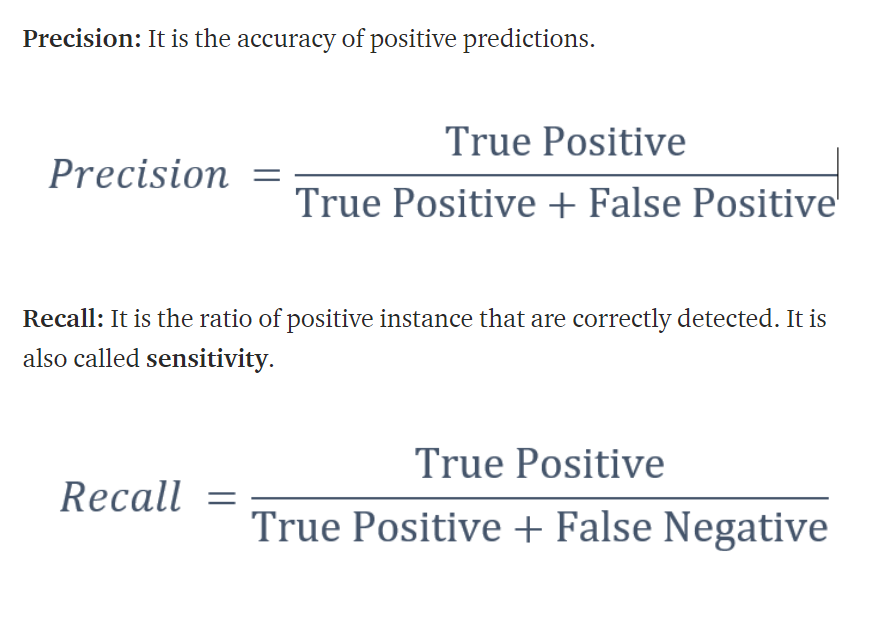

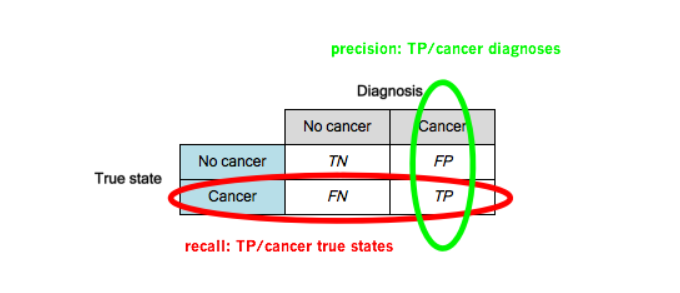

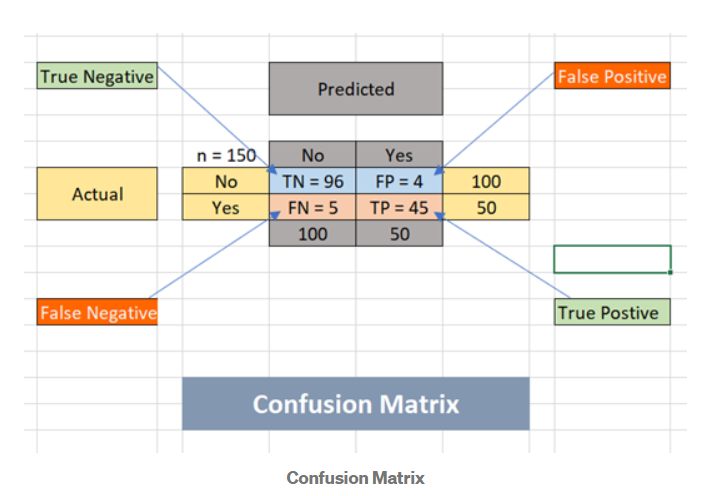

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_curve

##make sure you have loaded the dataset

In [11]:
df = pd.read_csv('heart.csv')
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [12]:
x = df.drop(['target'],axis=1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =.33, random_state = True)

In [13]:
model = LogisticRegression(solver='newton-cg').fit(x_train,y_train)

In [14]:
y_predict = model.predict(x_test)

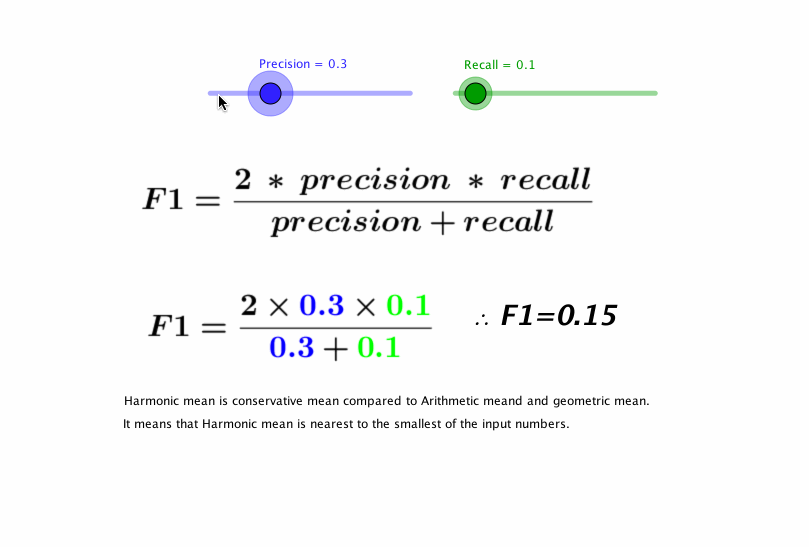

In [15]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74        46
           1       0.77      0.81      0.79        54

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [7]:
y_decision_function = model.decision_function(x_test)

In [8]:
precision,recall,threshold = precision_recall_curve(y_test,y_decision_function)

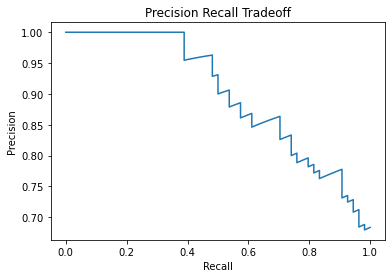

In [16]:
plt.plot(recall,precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Tradeoff')
plt.show()